In [1]:
import sys
sys.path.append("/home/jarlehti/projects/gradu")

In [10]:
import os
import jax
import jax.numpy as jnp
import numpy as np
import pandas as pd
import d3p
from src.napsu_mq.napsu_mq import NapsuMQModel, NapsuMQResult
from scripts.plot_marginals import plot_dataframe_marginal_comparison
from src.utils.preprocess_dataset import get_adult_train_small

In [3]:
CURRENT_FOLDER = os.path.dirname(os.path.dirname(os.path.abspath(__name__)))
DATASETS_FOLDER = os.path.join(CURRENT_FOLDER, "data", "datasets")
MODELS = os.path.join(CURRENT_FOLDER, "models")

In [9]:
rng = jax.random.PRNGKey(452345235)

In [12]:
adult_small = get_adult_train_small(DATASETS_FOLDER)

In [14]:
adult_small

,age,education-num,marital-status,hours-per-week,compensation
0,30 - 40,13,Never-married,40 - 50,0
1,50 - 60,13,Married-civ-spouse,10 - 20,0
2,30 - 40,9,Divorced,40 - 50,0
3,50 - 60,7,Married-civ-spouse,40 - 50,0
4,20 - 30,13,Married-civ-spouse,40 - 50,0
...,...,...,...,...,...
30157,20 - 30,12,Married-civ-spouse,30 - 40,0
30158,40 - 50,9,Married-civ-spouse,40 - 50,1
30159,50 - 60,9,Widowed,40 - 50,0
30160,20 - 30,9,Never-married,20 - 30,0


In [15]:
n, d = adult_small.shape

In [16]:
n

30162

In [5]:
napsu_result_read_file = open(os.path.join(MODELS, "napsu_adult_small_empty_01e_NUTS.dill"), "rb")
loaded_result = NapsuMQResult.load(napsu_result_read_file)

In [7]:
loaded_result.meta

{'experiment_id': 'BXVZNJLF',
 'dataset_name': 'adult_small',
 'query_str': 'empty',
 'query_list': [],
 'epsilon': 0.1,
 'delta': 1.0992076159646117e-09,
 'MCMC_algo': 'NUTS',
 'laplace_approximation': True,
 'missing_query': None,
 'discretization': None,
 'n_canonical_queries': 162,
 'junction_tree_width': 2,
 'suff_stat_dim': (162,),
 'laplace_approximation_algorithm': 'jaxopt_LBFGS'}

In [17]:
syn_datasets = loaded_result.generate_extended(rng, n, 100)

Generating data with 30162 points and 100 datasets


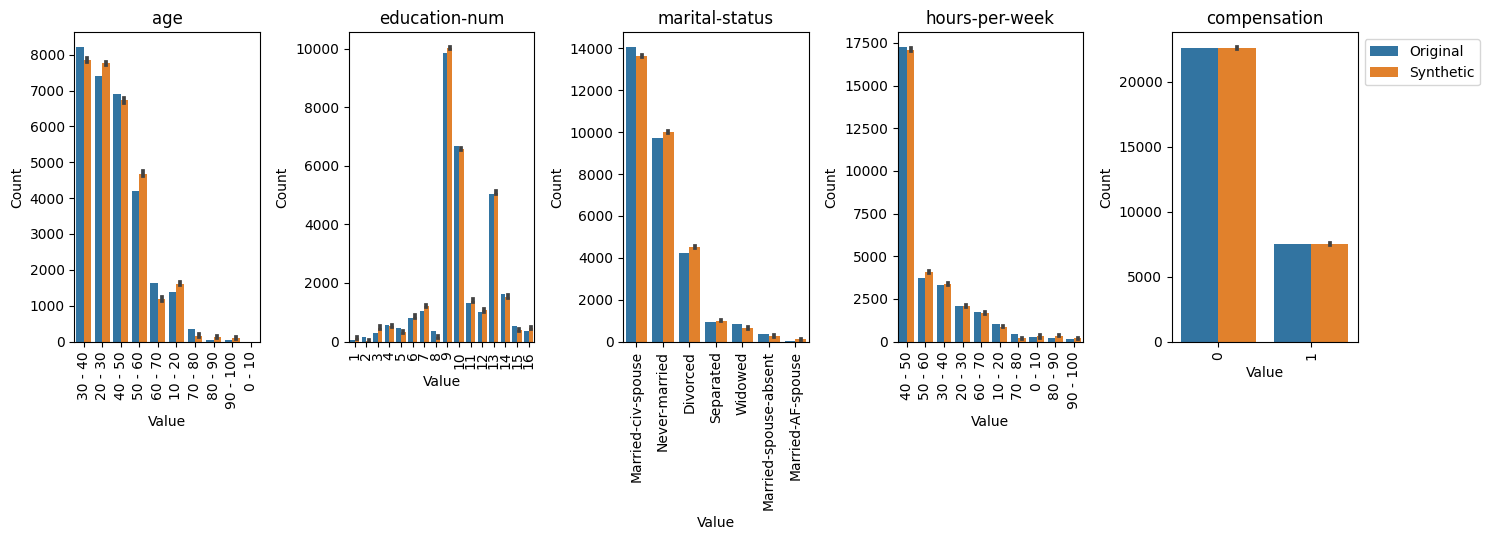

In [20]:
plot_dataframe_marginal_comparison(adult_small, syn_datasets)